<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%201%20DL%201/IrisDnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feed Forward DNN for the Iris Dataset

Load the Iris Dataset

In [ ]:
import pandas as pd   # import the pandas library for data exploration
from sklearn.datasets import load_iris    # load the iris dataset from the Sci kit learn library

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Data Setup

In [ ]:
# Normalise the data
from sklearn.preprocessing import normalize
df_norm = normalize(df)
df_norm[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)  # random_state controls the shuffling applied to the data before the split

In [ ]:
# one hot encode the training data
from tensorflow.keras import utils
y_train_cat = utils.to_categorical(y_train)
y_train_cat[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
y_test_cat = utils.to_categorical(y_test)
y_test_cat[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

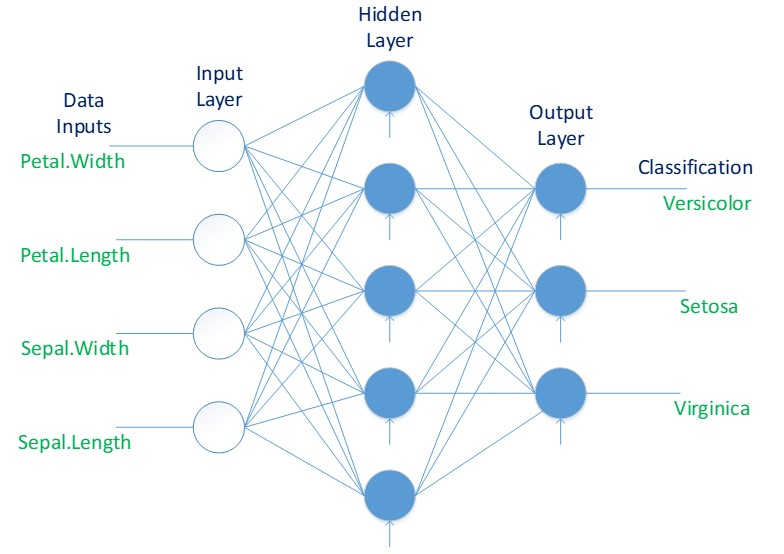

Create the model

In [ ]:
# Create the neural network (replace the question marks)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()  # creates an empty model we can add layers to
model.add(Dense(units=5, input_dim=4, activation='relu'))  # input layer and first layer combined
model.add(Dense(units=3, activation='softmax'))   # output layer

How many trainable parameters does this network have?

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [ ]:
# 1. Compile the model (replace the question marks)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit Model with Training Data Set

In [ ]:
# Fit the model (replace the question marks)
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

Epoch 1/125
12/12 [==============================] - 1s 17ms/step - loss: 1.0980 - accuracy: 0.3032 - val_loss: 1.1018 - val_accuracy: 0.3421
Epoch 2/125
12/12 [==============================] - 0s 4ms/step - loss: 1.0761 - accuracy: 0.3463 - val_loss: 1.1058 - val_accuracy: 0.3421
Epoch 3/125
12/12 [==============================] - 0s 5ms/step - loss: 1.0908 - accuracy: 0.3080 - val_loss: 1.1058 - val_accuracy: 0.3421
Epoch 4/125
12/12 [==============================] - 0s 5ms/step - loss: 1.0880 - accuracy: 0.3392 - val_loss: 1.1068 - val_accuracy: 0.3421
Epoch 5/125
12/12 [==============================] - 0s 5ms/step - loss: 1.0719 - accuracy: 0.3413 - val_loss: 1.1072 - val_accuracy: 0.3421
Epoch 6/125
12/12 [==============================] - 0s 5ms/step - loss: 1.0812 - accuracy: 0.3389 - val_loss: 1.1061 - val_accuracy: 0.3421
Epoch 7/125
12/12 [==============================] - 0s 5ms/step - loss: 1.0718 - accuracy: 0.3343 - val_loss: 1.1057 - val_accuracy: 0.3421
Epoch 8/125


Exercise 7: Plot and Analyse

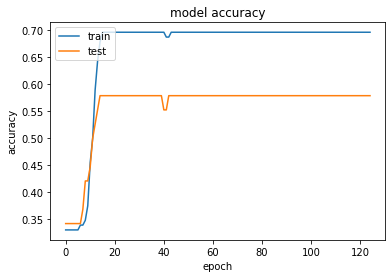

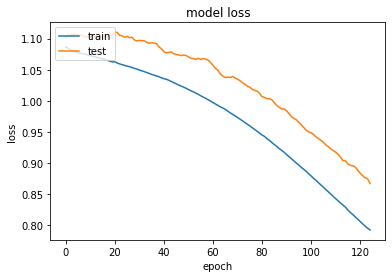

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Change the number of units in the hidden layer to 10.  What effect do these changes have on the accuracy?

You will need to re-compile and re-fit the model and re-plot the training history.

## Make the neural network into a deep neural network by adding a layer.  What effect do these changes have on the accuracy?